In [35]:
# toy example
X_train = ['I love the book', 'This is a great book', 'the fit is great', 'I love the shoes']
y_train = ['books', 'books', 'clothing', 'clothing']

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [37]:
pipe = Pipeline(steps = [('tfidf_vect', TfidfVectorizer()),
                          ('nb_clf', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vect', TfidfVectorizer()), ('nb_clf', MultinomialNB())])

In [38]:
# toy testing data
X_test = ['I like the book', 'Shoes are alright', 'I love the books', 'I lost a shoe']
y_test = ['books', 'clothing', 'books', 'clothing']

# predict
pred = pipe.predict(X_test)
print(pred)

['books' 'clothing' 'clothing' 'books']


### Stemming

In [39]:
import pandas as pd
import nltk

In [40]:
# nltk.download('wordnet') # 
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('omw-1.4') # open multilingual wordnet library
# nltk.download('averaged_perceptron_tagger')

In [41]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [42]:
# initialize the stemmer
stemmer = PorterStemmer()

word = 'books'

stemmer.stem(word)

'book'

The tokenizer breaks a sentence into its individual words

In [43]:
phrase = 'I love the books.'
words = word_tokenize(phrase)
words

['I', 'love', 'the', 'books', '.']

In [44]:
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words

['i', 'love', 'the', 'book', '.']

In [45]:
' '.join(stemmed_words)

'i love the book .'

### Lemmatization

In [46]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [47]:
lemmatizer = WordNetLemmatizer()

The lemmatizer expects the parts of speech; by default, each token is a noun

In [48]:
lemmatizer.lemmatize('running', pos='v') # v: verb

'run'

In [49]:
lemmatizer.lemmatize('running', pos='n') # n: noun

'running'

In [50]:
lemmatizer.lemmatize('better', pos='r') # r: adverb

'well'

In [51]:
lemmatizer.lemmatize('better', pos='a') # a: adjective

'good'

In [52]:
# parts of speech tagging
pos_list = nltk.pos_tag(words)
pos_list

[('I', 'PRP'), ('love', 'VBP'), ('the', 'DT'), ('books', 'NNS'), ('.', '.')]

In [53]:
# process parts of speech function
def process_pos(pos):
    if pos.startswith('J'): # adjectives
        return wordnet.ADJ
    elif pos.startswith('V'): # verbs
        return wordnet.VERB
    elif pos.startswith('N'): # nouns
        return wordnet.NOUN
    elif pos.startswith('R'): # adverbs
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [54]:
lemmatized_words = [lemmatizer.lemmatize(word, pos=process_pos(pos)) for word,pos in nltk.pos_tag(words)]
lemmatized_words

['I', 'love', 'the', 'book', '.']

In [55]:
' '.join(lemmatized_words)

'I love the book .'

### Stopwords Removal

In [56]:
from nltk.corpus import stopwords

In [57]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
phrase = 'here is an example sentence demonstrating the removal of stopwords.'
phrase

'here is an example sentence demonstrating the removal of stopwords.'

In [69]:
words = word_tokenize(phrase)
stripped_phrase = [word for word in words if word not in stop_words]
" ".join(stripped_phrase)

'example sentence demonstrating removal stopwords .'

### Punctuation Removal

In [60]:
import string
punctuation = [punc for punc in string.punctuation]
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [61]:
phrase = 'Hello! How are you?'
words = word_tokenize(phrase)
stripped_phrase = [word for word in words if word not in punctuation]
" ".join(stripped_phrase)

'Hello How are you'

### Example: Yelp Reviews

In [62]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/yelp.csv'
yelp = pd.read_csv(url)[['text','stars']]
yelp.head()

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5


In [63]:
# reviews that only contains the 5-stars and 1-star reviews
yelp = yelp[yelp.stars.isin([1,5])].reset_index(drop=True)
yelp

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
3,General Manager Scott Petello is a good egg!!!...,5
4,Drop what you're doing and drive here. After I...,5
...,...,...
4081,Yes I do rock the hipster joints. I dig this ...,5
4082,Only 4 stars? \n\n(A few notes: The folks that...,5
4083,I'm not normally one to jump at reviewing a ch...,5
4084,Let's see...what is there NOT to like about Su...,5


In [64]:
print(yelp.loc[0,'text'])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [65]:
text = yelp.loc[0,'text']
words = word_tokenize(text)
words = [word.lower() for word in words]
lemmatized_words = [lemmatizer.lemmatize(word, pos=process_pos(pos)) 
                    for word,pos in nltk.pos_tag(words) 
                    if word not in stop_words and word not in punctuation]
print(' '.join(lemmatized_words))

wife take birthday breakfast excellent weather perfect make sit outside overlook ground absolute pleasure waitress excellent food arrive quickly semi-busy saturday morning look like place fill pretty quickly early get good favor get bloody mary phenomenal simply best 've ever 'm pretty sure use ingredient garden blend fresh order amaze everything menu look excellent white truffle scramble egg vegetable skillet tasty delicious come 2 piece griddle bread amaze absolutely make meal complete best `` toast '' 've ever anyway ca n't wait go back


process each line of the df and lemmitize the words

In [72]:
for i in range(len(yelp)):
    text = yelp.loc[i,'text']
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos=process_pos(pos)) 
                        for word,pos in nltk.pos_tag(words) 
                        if word not in stop_words and word not in punctuation]
    yelp.loc[i,'processed_text'] = ' '.join(lemmatized_words)
yelp

,text,stars,processed_text
0,My wife took me here on my birthday for breakf...,5,wife take birthday breakfast excellent weather...
1,I have no idea why some people give bad review...,5,idea people give bad review place go show plea...
2,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,rosie dakota love chaparral dog park 's conven...
3,General Manager Scott Petello is a good egg!!!...,5,general manager scott petello good egg go deta...
4,Drop what you're doing and drive here. After I...,5,drop 're drive eat go back next day food good ...
...,...,...,...
4081,Yes I do rock the hipster joints. I dig this ...,5,yes rock hipster joint dig place little bit sc...
4082,Only 4 stars? \n\n(A few notes: The folks that...,5,4 star note folk rat place low must isolate in...
4083,I'm not normally one to jump at reviewing a ch...,5,'m normally one jump review chain restaurant e...
4084,Let's see...what is there NOT to like about Su...,5,let 's see ... like surprise stadium well 9.50...


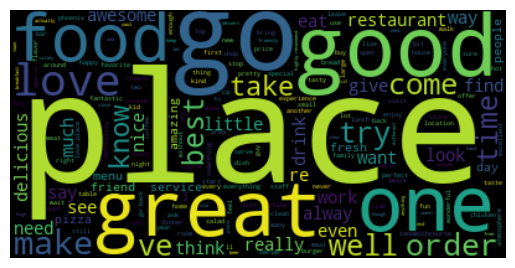

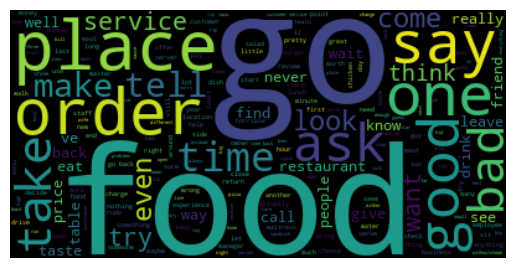

In [76]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 5-star reviews on left, 1-star reviews on right
five_star = yelp[yelp.stars==5].reset_index(drop=True)
one_star = yelp[yelp.stars==1].reset_index(drop=True)

# wordcloud for 5-star reviews
text = ' '.join(five_star.processed_text)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud for 1-star reviews
text = ' '.join(one_star.processed_text)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [78]:
# predict
X = yelp.processed_text
y = yelp.stars

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

pipe = Pipeline(steps = [('tfidf_vect', TfidfVectorizer()),
                            ('nb_clf', MultinomialNB())])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8082191780821918